# out layers are extrem values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data1 = data.drop(['Unnamed: 0',"Temp C"],axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [4]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [5]:
data1.rename({'Solar.R':'Solar'},axis=1, inplace= True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [6]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar    151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


<Axes: >

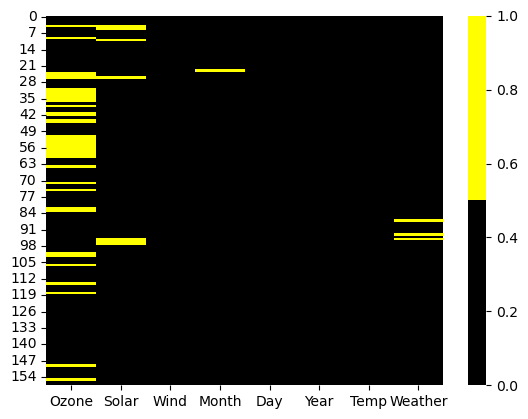

In [8]:
cols = data1.columns
colors = ['black','yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)
                                                        

In [9]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [10]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [11]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [12]:
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

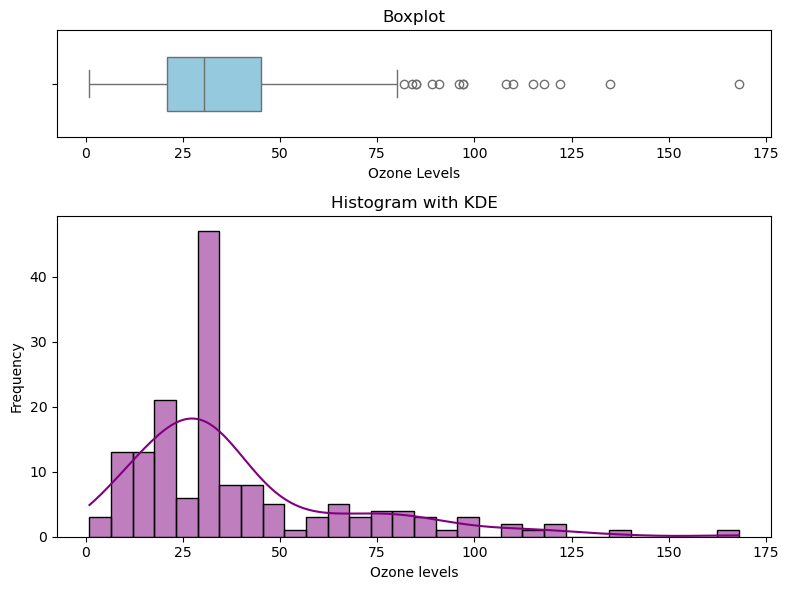

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1,3]})
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient= 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


# observation
the ozone columns has extreme values beyond 81 as seen from box plot

the same is confrimed from the below right-skewed histogram

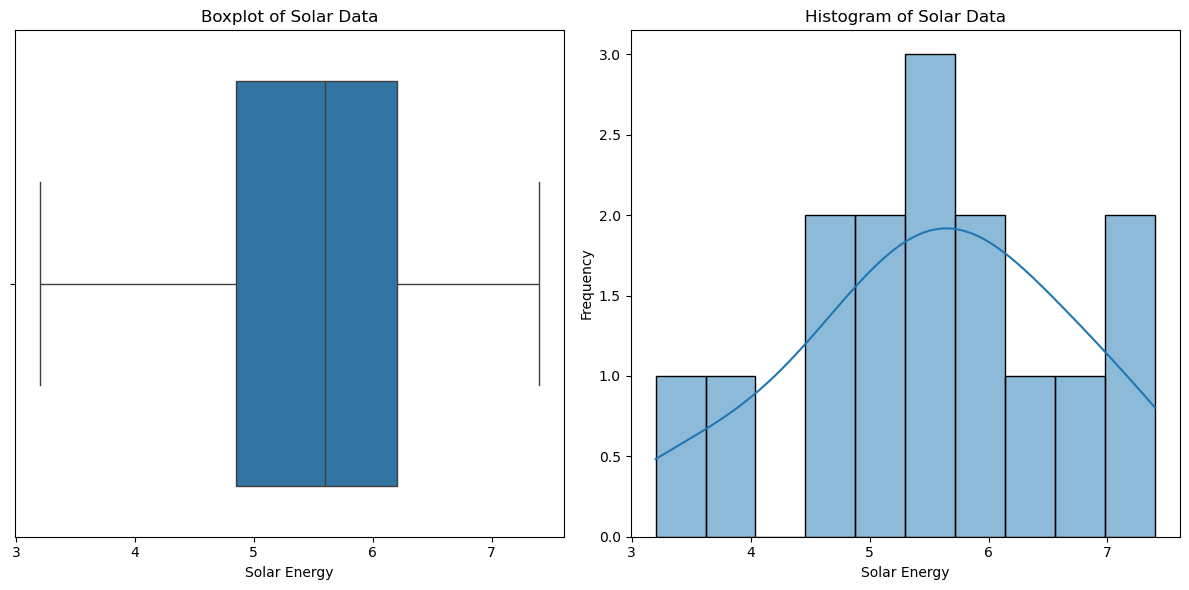

In [14]:
# Sample DataFrame creation (replace with your solar data)
data = {
    'solar': [3.2, 4.5, 5.6, 6.1, 7.0, 5.5, 6.3, 7.4, 3.8, 6.9, 4.8, 5.3, 6.0, 4.9, 5.7]
}
df = pd.DataFrame(data)

# Set up the figure for subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
sns.boxplot(data=df, x='solar', ax=axes[0])
axes[0].set_title('Boxplot of Solar Data')
axes[0].set_xlabel('Solar Energy')

# Histogram
sns.histplot(df['solar'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Solar Data')
axes[1].set_xlabel('Solar Energy')
axes[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()  # Adjusts spacing between plots
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x184786f9eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x184787dbc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x184787db440>],
 'medians': [<matplotlib.lines.Line2D at 0x184788141a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x184788144a0>],
 'means': []}

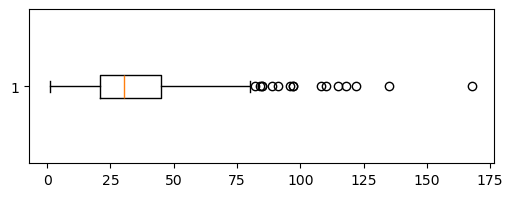

In [15]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"], vert= False)

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

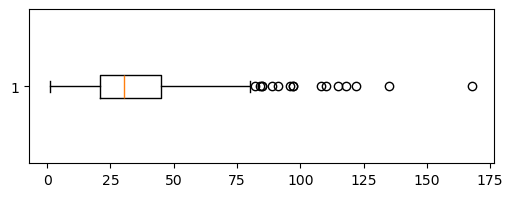

In [16]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']] #fliers are outliers



In [17]:
data1["Ozone"].describe()


count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [18]:

mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\HP\AppData\Local\Temp\ipykernel_18720\1752923922.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\HP\AppData\Local\Temp\ipykernel_18720\1752923922.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Text(0.5, 0, 'Theoretical Quantile')

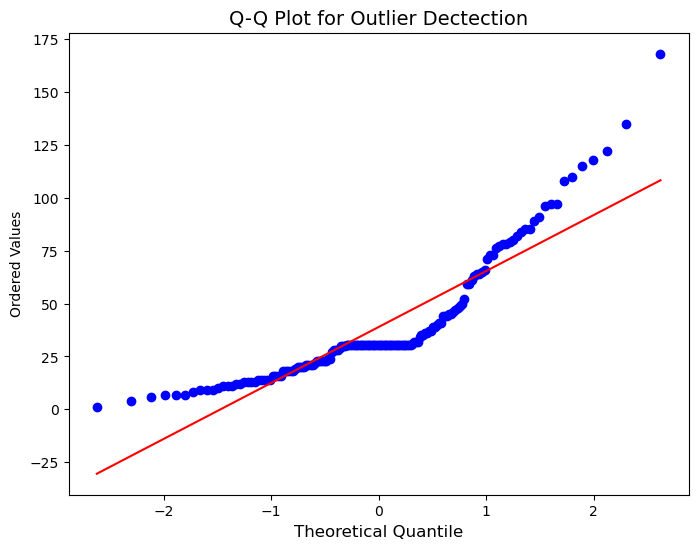

In [19]:
import scipy.stats as stats
# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Dectection", fontsize=14)
plt.xlabel("Theoretical Quantile", fontsize=12)


Text(0.5, 1.0, 'Violin Plot')

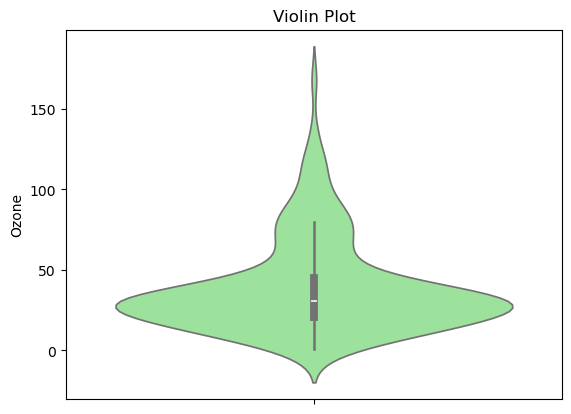

In [20]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

C:\Users\HP\AppData\Local\Temp\ipykernel_18720\1645313260.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x= "Weather", y = "Ozone", color="Orange", palette="Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

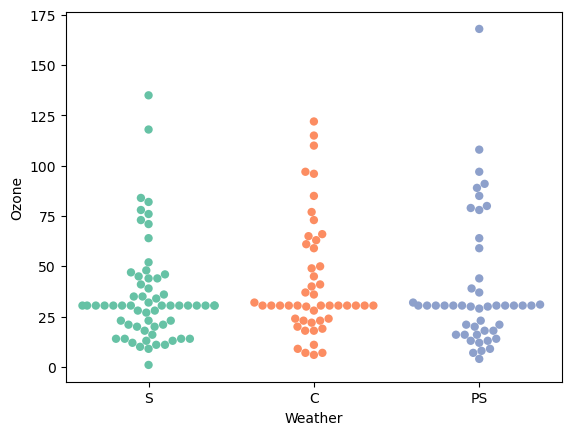

In [21]:
sns.swarmplot(data=data1, x= "Weather", y = "Ozone", color="Orange", palette="Set2", size=6)

<Axes: xlabel='Ozone', ylabel='Density'>

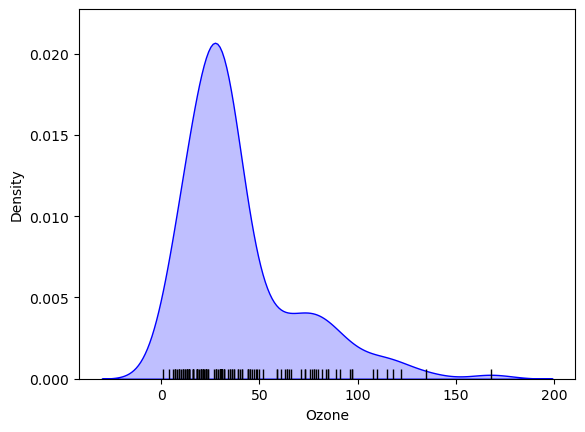

In [22]:
sns.kdeplot(data=data1["Ozone"], fill=True, color = "blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

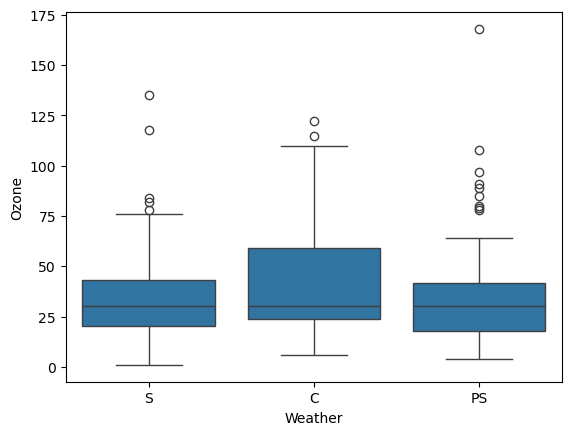

In [23]:
sns.boxplot(data=data1, x="Weather", y="Ozone")

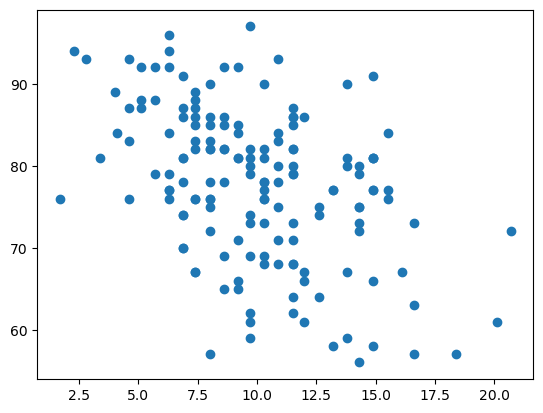

In [24]:
plt.scatter(data1["Wind"],data1["Temp"])

In [25]:
data1["Wind"].corr(data1["Temp"])

-0.441246717631239

In [26]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,30.5,NaN,14.3,56
...,...,...,...,...
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,30.5,145.0,13.2,77
156,14.0,191.0,14.3,75


In [28]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,30.5,NaN,14.3,56
...,...,...,...,...
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,30.5,145.0,13.2,77
156,14.0,191.0,14.3,75


In [30]:
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.300214,-0.526616,0.596304
Solar,0.300214,1.000000,-0.056594,0.273322
Wind,-0.526616,-0.056594,1.000000,-0.441247
Temp,0.596304,0.273322,-0.441247,1.000000


## observations
- the highest correlation strength id observed between ozone and temperature (0.597087)
- the next higher correlation strength id observed between ozone and wind (-0.523728)
- the next higher correlation strength id observed between wind and temp(-0.441228)

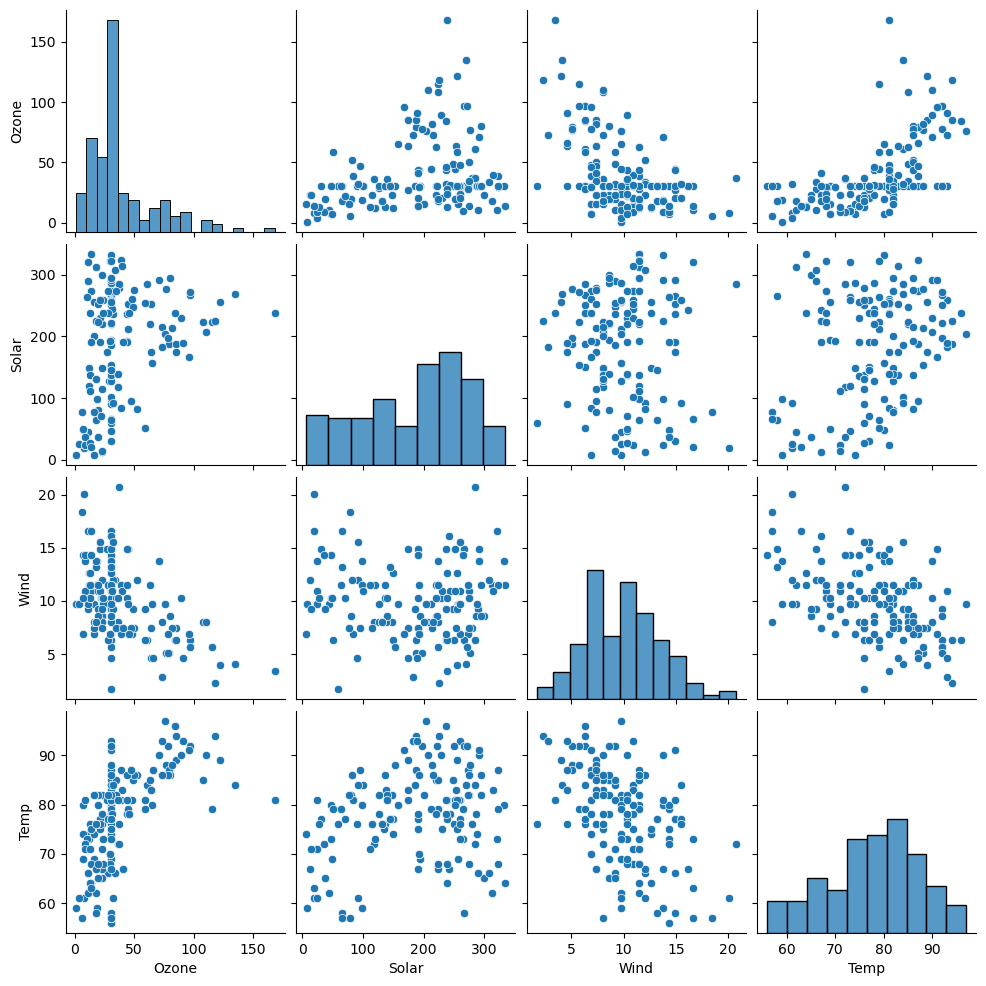

In [31]:
sns.pairplot(data1_numeric)

# Transformations

In [32]:
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,30.5,NaN,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,30.5,145.0,13.2,27,2010,77,False,False,False,False,True,False,False,True
156,14.0,191.0,14.3,28,2010,75,False,False,False,False,True,False,False,True


In [34]:
data1_numeric.values

array([[ 41. , 190. ,   7.4,  67. ],
       [ 36. , 118. ,   8. ,  72. ],
       [ 12. , 149. ,  12.6,  74. ],
       [ 18. , 313. ,  11.5,  62. ],
       [ 30.5,   nan,  14.3,  56. ],
       [ 28. ,   nan,  14.9,  66. ],
       [ 23. , 299. ,   8.6,  65. ],
       [ 19. ,  99. ,  13.8,  59. ],
       [  8. ,  19. ,  20.1,  61. ],
       [ 30.5, 194. ,   8.6,  69. ],
       [  7. ,   nan,   6.9,  74. ],
       [ 16. , 256. ,   9.7,  69. ],
       [ 11. , 290. ,   9.2,  66. ],
       [ 14. , 274. ,  10.9,  68. ],
       [ 18. ,  65. ,  13.2,  58. ],
       [ 14. , 334. ,  11.5,  64. ],
       [ 34. , 307. ,  12. ,  66. ],
       [  6. ,  78. ,  18.4,  57. ],
       [ 30. , 322. ,  11.5,  68. ],
       [ 11. ,  44. ,   9.7,  62. ],
       [  1. ,   8. ,   9.7,  59. ],
       [ 11. , 320. ,  16.6,  73. ],
       [  4. ,  25. ,   9.7,  61. ],
       [ 32. ,  92. ,  12. ,  61. ],
       [ 30.5,  66. ,  16.6,  57. ],
       [ 30.5, 266. ,  14.9,  58. ],
       [ 30.5,   nan,   8. ,  57. ],
 

In [35]:
# normalisation of dataa
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScalar

array = data1_numeric.values

scaler = MinMaxScaler(features_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precisions=2)
print(rescaledX[0:10,:])

ImportError: cannot import name 'MinMaxScalar' from 'sklearn.preprocessing' (C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)